In [1]:
from textblob import TextBlob
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
import lstm

Using TensorFlow backend.


In [2]:
# consumer keys and access tokens from the twitter app

# ADD YOUR KEYS
consumerKey = "" 
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

In [3]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [18]:
public_tweets = api.search(q= ['apple'], count =100)
threshold = 0
positive = 0
negative = 0

In [5]:
for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity > threshold:
        positive = positive + 1
    else:
        negative = negative + 1
if positive > negative:
    print("Positive Sentiment. Get ready to Invest")
else:
    print ("Negative Sentiment. Dont invest")

Positive Sentiment. Get ready to Invest


In [6]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-21,73.110001,74.900002,73.074287,74.480003,67.871170,99526700
1,2013-10-22,75.201431,75.492859,72.575714,74.267143,67.677200,133515900
2,2013-10-23,74.142860,75.095711,74.142860,74.994286,68.339828,78430800
3,2013-10-24,75.000000,76.067146,74.635712,75.987144,69.244583,96191200
4,2013-10-25,75.902855,76.175713,75.015717,75.137146,68.470024,84448000


In [12]:
df1 = df['Adj Close']
df1=df1.astype(float)
df1.to_csv('close_price.csv', index =False)
df1.shape

(1260,)

In [13]:
X_train, y_train, X_test, y_test =lstm.load_data('close_price.csv', 50, True)

In [14]:
model = Sequential()

model.add(LSTM(input_dim = 1,output_dim = 50,return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))
model.compile (loss = 'mse', optimizer = 'rmsprop')

In [15]:
model.fit(
        X_train,
        y_train,
        batch_size =4,
        nb_epoch = 1,
        validation_split = 0.05)

Train on 1034 samples, validate on 55 samples
Epoch 1/1
1034/1034 [==============================] - 11s 11ms/step - loss: 0.0012 - val_loss: 9.7323e-04


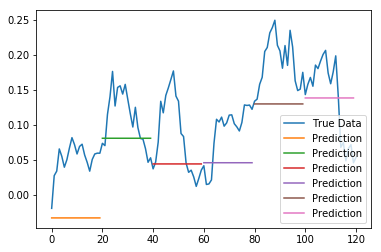

In [17]:
predictions = lstm.predict_sequences_multiple(model, X_test, 20, 20)
lstm.plot_results_multiple(predictions, y_test, 20)